In [1]:
import numpy as np

def calculate_mean_std_for_array(in_sample_ates, out_sample_ates, repeat_times):

    in_sample_ates_array = np.array(in_sample_ates)
    out_sample_ates_array = np.array(out_sample_ates)

    # in_sample_ates_array[25]=0.31
    # out_sample_ates_array[25]=1.75
    sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
    sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
    sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
    # print(sorted_in_sample_ates_array_ids)
    # print(sorted_in_sample_ates_array_ids[::-1])
    # print(sorted_in_sample_ates_array)
    # print(sorted_out_sample_ates_array)
    removed_count = max(int(repeat_times*0.15), 1)
    # print(removed_count)

    remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
    remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



    mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
    std_in_sample_ate = np.std(remaining_in_sample_ates_array)/np.sqrt(len(remaining_in_sample_ates_array))
    mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
    std_out_sample_ate = np.std(remaining_out_sample_ates_array)/np.sqrt(len(remaining_out_sample_ates_array))
    
    return mean_in_sample_ate, std_in_sample_ate, mean_out_sample_ate, std_out_sample_ate

In [5]:
import os, sys

size=100

seed=100

method_ls = ["bart","causal_rf","dragonnet","drnet","dt","ENRL","Ganite","lr","nam","ours","rf","tarnet","TransTEE","tvae","vcnet"]

for method in method_ls:

    # method="ours"

    log_folder = "/data2/wuyinjun/causal_tabular/ihdp_small_data_"+ str(size) +"/seed_" + str(seed) + "/" + method + "/logs/"
    # log_folder = "/data2/wuyinjun/causal_tabular/seed_100/TransTEE/logs/"

    repeat_times =40

    in_sample_ates=[]
    out_sample_ates=[]

    train_prefix = "best train ate::"
    test_prefix = "best test ate::"
    # test_prefix="outcome loss::"
    for i in range(1, repeat_times):
        curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
        if not os.path.exists(curr_log_file):
            continue
        with open(curr_log_file, "r") as f:
            lines = f.readlines()
            in_sample_ate=1e6
            out_sample_ate=1e6
            for line in lines:
                # print(line)
                if line.startswith(train_prefix):
                    in_sample_ate = float(line.split(train_prefix)[1].strip())
                if line.startswith(test_prefix):
                    out_sample_ate = float(line.split(test_prefix)[1].strip())

            in_sample_ates.append(in_sample_ate)
            out_sample_ates.append(out_sample_ate)        

    mean_in_sample_ate, std_in_sample_ate, mean_out_sample_ate, std_out_sample_ate= calculate_mean_std_for_array(in_sample_ates, out_sample_ates, repeat_times)
    print("method::", method)
    print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
    print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))
    print()


method:: bart
in sample ate: 3.168343+-0.19416576088911897
out sample ate: 3.6944426176470584+-0.20517877022730605

method:: causal_rf
in sample ate: 1.5324667352941177+-0.2921111416352729
out sample ate: 1.3109413529411764+-0.2466124369698729

method:: dragonnet
in sample ate: 1.0479607647058824+-0.1756321651062777
out sample ate: 0.9197056470588236+-0.15230766104518564

method:: drnet
in sample ate: 0.8035236764705883+-0.13458659930292782
out sample ate: 0.7462440882352941+-0.1018139162814853

method:: dt
in sample ate: 2.727183088235294+-0.4279016469718261
out sample ate: 6.405486911764704+-1.2254844479435492

method:: ENRL
in sample ate: 3.7508746176470593+-0.17347531769389646
out sample ate: 4.327708911764707+-0.1308284767948311

method:: Ganite
in sample ate: 0.6264652058823531+-0.09363017972134768
out sample ate: 0.5431106470588235+-0.08608729788587967

method:: lr
in sample ate: 3350094542423.822+-1058581997959.9436
out sample ate: 1723402547078.3516+-544570575088.0833

method:

KeyboardInterrupt: 

In [2]:
print(in_sample_ates)
print(len(in_sample_ates))

[0.14955024421215057, 0.14135414361953735, 0.5763828158378601, 0.3422274887561798, 0.5026746988296509, 0.453214555978775, 0.15792421996593475, 0.15034373104572296, 3.2147436141967773, 0.6014382243156433, 5.7441534996032715, 2.868328094482422, 3.6111271381378174, 0.38595661520957947, 0.2139359563589096, 0.24509234726428986, 0.9535651803016663, 0.6076433062553406, 0.5565478205680847, 0.287627249956131, 0.5325333476066589, 0.0804508700966835, 0.596097469329834, 1.5519253015518188, 0.056249916553497314, 0.6369746327400208, 9.886484146118164, 1.654423713684082, 0.48373690247535706, 0.46453818678855896, 0.5374187231063843, 2.576349973678589, 0.41258540749549866, 1.5134176015853882, 0.8616147041320801, 0.6709203720092773, 0.4303046762943268, 1.2920546531677246, 2.130911350250244]
39


In [17]:
import os, sys

size_ls=[100]

seed=100

method_ls = ["bart","causal_rf","dragonnet","drnet","dt","ENRL","Ganite","lr","nam","rf","tarnet","TransTEE","tvae","vcnet","ours"]
# method_ls = ["bart","causal_rf","dt","ENRL","Ganite","nam","rf","TransTEE","tvae","ours"]

method_to_mean_in_sample_ate_ls_mappings = dict()
method_to_std_in_sample_ate_ls_mappings = dict()
method_to_mean_out_sample_ate_ls_mappings = dict()
method_to_std_out_sample_ate_ls_mappings = dict()

for method in method_ls:
    
    mean_in_sample_ate_ls = []
    std_in_sample_ate_ls = []
    mean_out_sample_ate_ls = []
    std_out_sample_ate_ls = []
    
    for size in size_ls:
        # method="ours"
        if method == "ours":
            # log_folder = "/data2/wuyinjun/causal_tabular/ihdp_small_data_"+ str(size) +"/seed_" + str(seed) + "/" + method + "/logs_reg3/"
        
            log_folder = "/data2/wuyinjun/causal_tabular/ihdp_small_data_"+ str(size) +"/seed_" + str(seed) + "/" + method + "/logs2/"
        else:
            log_folder = "/data2/wuyinjun/causal_tabular/ihdp_small_data_"+ str(size) +"/seed_" + str(seed) + "/" + method + "/logs/"
        print(log_folder)
        # log_folder = "/data2/wuyinjun/causal_tabular/seed_100/TransTEE/logs/"

        repeat_times =8

        in_sample_ates=[]
        out_sample_ates=[]

        train_prefix = "best train ate::"
        test_prefix = "best test ate::"
        # test_prefix="outcome loss::"
        for i in range(1, repeat_times):
            curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
            if not os.path.exists(curr_log_file):
                continue
            with open(curr_log_file, "r") as f:
                lines = f.readlines()
                in_sample_ate=1e6
                out_sample_ate=1e6
                for line in lines:
                    # print(line)
                    if line.startswith(train_prefix):
                        in_sample_ate = float(line.split(train_prefix)[1].strip())
                    if line.startswith(test_prefix):
                        out_sample_ate = float(line.split(test_prefix)[1].strip())

                in_sample_ates.append(in_sample_ate)
                out_sample_ates.append(out_sample_ate)        

        mean_in_sample_ate, std_in_sample_ate, mean_out_sample_ate, std_out_sample_ate= calculate_mean_std_for_array(in_sample_ates, out_sample_ates, repeat_times)
        print("method and size::", method, size)
        print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
        print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))
        mean_in_sample_ate_ls.append(mean_in_sample_ate)
        std_in_sample_ate_ls.append(std_in_sample_ate)
        mean_out_sample_ate_ls.append(mean_out_sample_ate)
        std_out_sample_ate_ls.append(std_out_sample_ate)
        print()
    
    method_to_mean_in_sample_ate_ls_mappings[method] = mean_in_sample_ate_ls
    method_to_std_in_sample_ate_ls_mappings[method] = std_in_sample_ate_ls
    method_to_mean_out_sample_ate_ls_mappings[method] = mean_out_sample_ate_ls
    method_to_std_out_sample_ate_ls_mappings[method] = std_out_sample_ate_ls
    


/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/bart/logs/
method and size:: bart 100
in sample ate: 3.1211177142857145+-0.58598459032054
out sample ate: 3.319222142857143+-0.714371196984965

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/causal_rf/logs/
method and size:: causal_rf 100
in sample ate: 0.6254268571428572+-0.2714897184526274
out sample ate: 0.8748699999999999+-0.46775598473174806

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/dragonnet/logs/


method and size:: dragonnet 100
in sample ate: 1.0429882857142858+-0.5627089411598625
out sample ate: 0.9353055714285714+-0.47080656651138475

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/drnet/logs/
method and size:: drnet 100
in sample ate: 0.639034857142857+-0.25509225013999715
out sample ate: 0.36939085714285713+-0.11436452752785958

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/dt/logs/
method and size:: dt 100
in sample ate: 4.708616857142857+-2.9925610431127136
out sample ate: 7.081550857142858+-4.6082349351554015

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/ENRL/logs/
method and size:: ENRL 100
in sample ate: 4.218732+-0.12414528649127196
out sample ate: 4.397931+-0.32773030101992745

/data2/wuyinjun/causal_tabular/ihdp_small_data_100/seed_100/Ganite/logs/
method and size:: Ganite 100
in sample ate: 0.42432671428571433+-0.05350600156141719
out sample ate: 0.6248589999999999+-0.2349280825136727

/data2/wuyinjun/causal_tabular/ihdp_sma

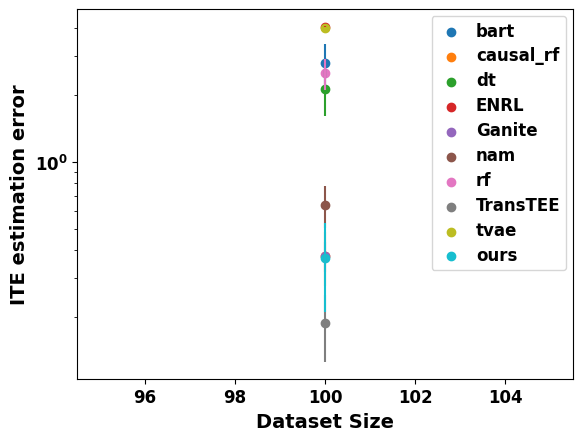

In [20]:
# TransTEE_res_val = [x[0] for x in TransTEE_train_res]
# ours_res_val = [x[0] for x in our_train_res]
# TransTEE_res_error = [x[1] for x in TransTEE_train_res]
# ours_res_error = [x[1] for x in our_train_res]
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="white")  # Optional: Set the style of the plot
# print(size_ls)
# print(TransTEE_res_val)
# print(TransTEE_res_error)
# The `ci` parameter controls the size of the confidence interval for error bars
# sns.pointplot(x=size_ls, y=TransTEE_res_val, yerr=TransTEE_res_error, linestyle="none", markersize=0, color='red', capsize=4, label="Error Bars" )
# sns.pointplot(x=size_ls, y=ours_res_val, yerr=ours_res_error, linestyle="none", markersize=0, color='red', capsize=4, label="Error Bars")

for method in method_ls:

    plt.scatter(size_ls, method_to_mean_out_sample_ate_ls_mappings[method], label=method)
    plt.errorbar(size_ls, method_to_mean_out_sample_ate_ls_mappings[method], yerr=method_to_std_out_sample_ate_ls_mappings[method])#, fmt='o', capsize=4, color='red', label="Error Bars")
# plt.scatter(size_ls, ours_res_val, label="Discrete")
# plt.errorbar(size_ls, ours_res_val, yerr=ours_res_error)#, fmt='o', capsize=4, color='red', label="Error Bars")

# Add labels and a title
plt.xlabel("Dataset Size", fontweight='bold', fontsize=14)
plt.ylabel("ITE estimation error", fontweight='bold', fontsize=14)
plt.yscale('log')
# plt.title("Scatter Plot with Error Bars")
# plt.legend(fontsize=12, loc='best')# Show the plot
legend = plt.legend(loc='best')
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_fontsize(12)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

plt.show()
# plt.savefig('data_size.svg', dpi=300, bbox_inches='tight')

In [3]:
import numpy as np
in_sample_ates_array = np.array(in_sample_ates)
out_sample_ates_array = np.array(out_sample_ates)

# in_sample_ates_array[25]=0.31
# out_sample_ates_array[25]=1.75
sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
print(sorted_in_sample_ates_array_ids)
print(sorted_in_sample_ates_array_ids[::-1])
print(sorted_in_sample_ates_array)
print(sorted_out_sample_ates_array)
removed_count = max(int(repeat_times*0.15), 1)
print(removed_count)

remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
std_in_sample_ate = np.std(remaining_in_sample_ates_array)/np.sqrt(len(remaining_in_sample_ates_array))
mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
std_out_sample_ate = np.std(remaining_out_sample_ates_array)/np.sqrt(len(remaining_out_sample_ates_array))
print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))

[24 21  1  0  7  6 14 15 19  3 13 32 36  5 29 28  4 20 30 18  2 22  9 17
 25 35 34 16 37 33 23 27 38 31 11  8 12 10 26]
[26 10 12  8 11 31 38 27 23 33 37 16 34 35 25 17  9 22  2 18 30 20  4 28
 29  5 36 32 13  3 19 15 14  6  7  0  1 21 24]
[0.05624992 0.08045087 0.14135414 0.14955024 0.15034373 0.15792422
 0.21393596 0.24509235 0.28762725 0.34222749 0.38595662 0.41258541
 0.43030468 0.45321456 0.46453819 0.4837369  0.5026747  0.53253335
 0.53741872 0.55654782 0.57638282 0.59609747 0.60143822 0.60764331
 0.63697463 0.67092037 0.8616147  0.95356518 1.29205465 1.5134176
 1.5519253  1.65442371 2.13091135 2.57634997 2.86832809 3.21474361
 3.61112714 5.7441535  9.88648415]
[0.03892186 0.13541268 0.14406499 0.17967269 0.18393476 0.22681171
 0.24347892 0.25571123 0.2884495  0.32946059 0.33705014 0.36948448
 0.44113037 0.47786778 0.47810778 0.48086083 0.48255116 0.49031138
 0.49353078 0.50923181 0.57920051 0.60764432 0.6348632  0.64412999
 0.66882676 0.76413578 0.7922383  0.8523221  0.9698922  

In [ ]:
import numpy as np

import os, sys
size_ls=[100,200,400,800,1500]
def get_repeat_ate(method="TransTEE/"):

    


    train_ate_ls=[]
    test_ate_ls=[]

    for size in size_ls:
        log_folder = "/data6/wuyinjun/causal_tabular/ihdp_" + str(size) + "/" + method + "logs/"

        repeat_times =6

        in_sample_ates=[]
        out_sample_ates=[]

        train_prefix = "best train ate::"
        test_prefix = "best test ate::"

        for i in range(1, repeat_times):
            curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
            print(curr_log_file)
            if not os.path.exists(curr_log_file):
                continue
            with open(curr_log_file, "r") as f:
                lines = f.readlines()
                in_sample_ate=1e6
                out_sample_ate=1e6
                for line in lines:
                    # print(line)
                    if line.startswith(train_prefix):
                        in_sample_ate = float(line.split(train_prefix)[1].strip())
                    if line.startswith(test_prefix):
                        out_sample_ate = float(line.split(test_prefix)[1].strip())

                in_sample_ates.append(in_sample_ate)
                out_sample_ates.append(out_sample_ate)   
        in_sample_ates_array = np.array(in_sample_ates)
        out_sample_ates_array = np.array(out_sample_ates)

        # in_sample_ates_array[25]=0.31
        # out_sample_ates_array[25]=1.75
        sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
        sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
        sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
        print(sorted_in_sample_ates_array_ids)
        print(sorted_in_sample_ates_array_ids[::-1])
        print(sorted_in_sample_ates_array)
        removed_count = int(repeat_times*0.1)

        remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
        remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



        mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
        std_in_sample_ate = np.std(remaining_in_sample_ates_array)
        mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
        std_out_sample_ate = np.std(remaining_out_sample_ates_array)
        print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
        print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))
        
        train_ate_ls.append((mean_in_sample_ate, std_in_sample_ate))
        test_ate_ls.append((mean_out_sample_ate, std_out_sample_ate))

    print(train_ate_ls)
    print(test_ate_ls)
    return train_ate_ls, test_ate_ls

In [ ]:
TransTEE_train_res, TransTEE_test_res = get_repeat_ate(method="TransTEE/")
our_train_res, our_test_res = get_repeat_ate(method="")

In [ ]:
TransTEE_res_val = [x[0] for x in TransTEE_train_res]
ours_res_val = [x[0] for x in our_train_res]
TransTEE_res_error = [x[1] for x in TransTEE_train_res]
ours_res_error = [x[1] for x in our_train_res]
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="white")  # Optional: Set the style of the plot
print(size_ls)
print(TransTEE_res_val)
print(TransTEE_res_error)
# The `ci` parameter controls the size of the confidence interval for error bars
# sns.pointplot(x=size_ls, y=TransTEE_res_val, yerr=TransTEE_res_error, linestyle="none", markersize=0, color='red', capsize=4, label="Error Bars" )
# sns.pointplot(x=size_ls, y=ours_res_val, yerr=ours_res_error, linestyle="none", markersize=0, color='red', capsize=4, label="Error Bars")

plt.scatter(size_ls, TransTEE_res_val, label="TransTEE")
plt.errorbar(size_ls, TransTEE_res_val, yerr=TransTEE_res_error)#, fmt='o', capsize=4, color='red', label="Error Bars")
plt.scatter(size_ls, ours_res_val, label="Discrete")
plt.errorbar(size_ls, ours_res_val, yerr=ours_res_error)#, fmt='o', capsize=4, color='red', label="Error Bars")

# Add labels and a title
plt.xlabel("Dataset Size", fontweight='bold', fontsize=14)
plt.ylabel("ITE estimation error", fontweight='bold', fontsize=14)
# plt.title("Scatter Plot with Error Bars")
# plt.legend(fontsize=12, loc='best')# Show the plot
legend = plt.legend(loc='best')
for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_fontsize(12)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
# plt.show()
plt.savefig('data_size.svg', dpi=300, bbox_inches='tight')

In [ ]:
import os, sys

log_folder = "/data6/wuyinjun/nlp_causal_data/EEEC/TransTEE/logs/Race/"
exp_type = "anchor"
repeat_times =4

in_sample_ates=[]
out_sample_ates=[]

train_prefix = "consistency score::"
test_prefix = "sufficiency score::"

for i in range(1, repeat_times):
    curr_log_file = os.path.join(log_folder, "output_" + exp_type + "_log_{}.txt".format(i))
    print(curr_log_file)
    if not os.path.exists(curr_log_file):
        continue
    
    with open(curr_log_file, "r") as f:
        
        lines = f.readlines()
        in_sample_ate=1e6
        out_sample_ate=1e6
        for line in lines:
            if line.startswith(train_prefix):
                in_sample_ate = float(line.split(train_prefix)[1].strip())
            if line.startswith(test_prefix):
                out_sample_ate = float(line.split(test_prefix)[1].strip())

        in_sample_ates.append(in_sample_ate)
        out_sample_ates.append(out_sample_ate)  
print(in_sample_ates)
print(out_sample_ates)

In [ ]:
train_ate_ls=[]
test_ate_ls=[]

for size in size_ls:
    log_folder = "/data6/wuyinjun/causal_tabular/ihdp/logs_ab_2/"

    repeat_times =6

    in_sample_ates=[]
    out_sample_ates=[]

    train_prefix = "best train ate::"
    test_prefix = "best test ate::"

    for i in range(1, repeat_times):
        curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
        print(curr_log_file)
        if not os.path.exists(curr_log_file):
            continue
        with open(curr_log_file, "r") as f:
            lines = f.readlines()
            in_sample_ate=1e6
            out_sample_ate=1e6
            for line in lines:
                # print(line)
                if line.startswith(train_prefix):
                    in_sample_ate = float(line.split(train_prefix)[1].strip())
                if line.startswith(test_prefix):
                    out_sample_ate = float(line.split(test_prefix)[1].strip())

            in_sample_ates.append(in_sample_ate)
            out_sample_ates.append(out_sample_ate)   
    in_sample_ates_array = np.array(in_sample_ates)
    out_sample_ates_array = np.array(out_sample_ates)

    # in_sample_ates_array[25]=0.31
    # out_sample_ates_array[25]=1.75
    sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
    sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
    sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
    print(sorted_in_sample_ates_array_ids)
    print(sorted_in_sample_ates_array_ids[::-1])
    print(sorted_in_sample_ates_array)
    removed_count = int(repeat_times*0.1)

    remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
    remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



    mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
    std_in_sample_ate = np.std(remaining_in_sample_ates_array)
    mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
    std_out_sample_ate = np.std(remaining_out_sample_ates_array)
    print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
    print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))
    
    train_ate_ls.append((mean_in_sample_ate, std_in_sample_ate))
    test_ate_ls.append((mean_out_sample_ate, std_out_sample_ate))

print(train_ate_ls)
print(test_ate_ls)

In [ ]:
import numpy as np
in_sample_ates_array = np.array(in_sample_ates)
out_sample_ates_array = np.array(out_sample_ates)

# in_sample_ates_array[25]=0.31
# out_sample_ates_array[25]=1.75
sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
print(sorted_in_sample_ates_array_ids)
print(sorted_in_sample_ates_array_ids[::-1])
print(sorted_in_sample_ates_array)
removed_count = int(repeat_times*0.1)

remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
std_in_sample_ate = np.std(remaining_in_sample_ates_array)
mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
std_out_sample_ate = np.std(remaining_out_sample_ates_array)
print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))

In [ ]:
import os,sys
import numpy as np
log_folder = "/data6/wuyinjun/image_causal_data/uganda/logs_no_tr_no_hyp/"
repeat_times =3

in_sample_ates=[]
out_sample_ates=[]

train_prefix = "best test outcome error:: tensor("
# train_prefix = "outcome loss::"
# test_prefix = "best test ate::"

for i in range(1, repeat_times):
    curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
    print(curr_log_file)
    if not os.path.exists(curr_log_file):
        continue
    with open(curr_log_file, "r") as f:
        lines = f.readlines()
        in_sample_ate=1e6
        out_sample_ate=1e6
        count = 0
        test_loss_ls = []
        val_loss_ls = []
        for line in lines:
            # print(line)
            # if line.startswith(train_prefix):
            if train_prefix in line:
                
                in_sample_ate = float(line.split(train_prefix)[-1].split(")")[0].strip())
                # if count > 0:
                #     if count %2 == 1:
                #         val_loss_ls.append(in_sample_ate)
                #     else:
                #         test_loss_ls.append(in_sample_ate)
                # count += 1
        # val_loss_ls = np.array(val_loss_ls[0:-1])
        # test_loss_ls = np.array(test_loss_ls)
        # # print(val_loss_ls)
        # # print(len(test_loss_ls))
        # min_id = np.argmin(val_loss_ls)
        # in_sample_ate = test_loss_ls[min_id]
        
        in_sample_ates.append(in_sample_ate)
        # out_sample_ates.append(out_sample_ate)        
print(in_sample_ates)

In [ ]:
import numpy as np
in_sample_ates = [1.8922, 1.5908, 1.8922]
repeat_times = len(in_sample_ates)
in_sample_ates_array = np.array(in_sample_ates)

# in_sample_ates_array[25]=0.31
# out_sample_ates_array[25]=1.75

sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
print(sorted_in_sample_ates_array_ids)
print(sorted_in_sample_ates_array_ids[::-1])
print(sorted_in_sample_ates_array)
removed_count = max(int(repeat_times*0.1),0)
print(repeat_times, removed_count)
remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-1-removed_count]

print(remaining_in_sample_ates_array)

mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
std_in_sample_ate = np.std(remaining_in_sample_ates_array)
print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))

In [ ]:
import os,sys
import numpy as np
log_folder = "/data6/wuyinjun/causal_tabular/news_cont/nam/logs/"
repeat_times =4

in_sample_ates=[]
out_sample_ates=[]

# train_prefix = "best test outcome error::"
train_prefix = "best test outcome error:: tensor("
# train_prefix = "outcome loss::"
test_prefix = "best test outcome error::"

for i in range(1, repeat_times):
    curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
    print(curr_log_file)
    if not os.path.exists(curr_log_file):
        continue
    with open(curr_log_file, "r") as f:
        lines = f.readlines()
        in_sample_ate=1e6
        out_sample_ate=1e6
        count = 0
        test_loss_ls = []
        val_loss_ls = []
        for line in lines:
            # print(line)
            if test_prefix in line:
                in_sample_ate = float(line.split(test_prefix)[-1].strip())
            if test_prefix in line:
                out_sample_ate = float(line.split(test_prefix)[-1].strip())
            # if line.startswith(train_prefix):
                
            #     # in_sample_ate = float(line.split(train_prefix)[-1].split(")")[0].strip())
            #     in_sample_ate = float(line.split(train_prefix)[-1].strip())
                # if count > 0:
                #     if count %2 == 1:
                #         val_loss_ls.append(in_sample_ate)
                #     else:
                #         test_loss_ls.append(in_sample_ate)
                # count += 1
        # val_loss_ls = np.array(val_loss_ls[0:-1])
        # test_loss_ls = np.array(test_loss_ls)
        # # print(val_loss_ls)
        # # print(len(test_loss_ls))
        # min_id = np.argmin(val_loss_ls)
        # in_sample_ate = test_loss_ls[min_id]
        
        in_sample_ates.append(in_sample_ate)
        out_sample_ates.append(out_sample_ate)        
print(in_sample_ates)

In [ ]:
import os,sys
import numpy as np
log_folder = "/data6/wuyinjun/causal_tabular/ihdp_cont/nam/logs/"
repeat_times =9

in_sample_ates=[]
out_sample_ates=[]

train_prefix = "outcome loss::"
# test_prefix = "best test ate::"

for i in range(1, repeat_times):
    curr_log_file = os.path.join(log_folder, "output_{}.txt".format(i))
    print(curr_log_file)
    if not os.path.exists(curr_log_file):
        continue
    with open(curr_log_file, "r") as f:
        lines = f.readlines()
        in_sample_ate=1e6
        out_sample_ate=1e6
        count = 0
        test_loss_ls = []
        val_loss_ls = []
        for line in lines:
            # print(line)
            if line.startswith(train_prefix):
                
                in_sample_ate = float(line.split(train_prefix)[1].strip())
        #         if count > 0:
        #             if count %2 == 1:
        #                 val_loss_ls.append(in_sample_ate)
        #             else:
        #                 test_loss_ls.append(in_sample_ate)
        #         count += 1
        # val_loss_ls = np.array(val_loss_ls[0:-1])
        # test_loss_ls = np.array(test_loss_ls)
        # print(val_loss_ls)
        # print(len(test_loss_ls))
        # min_id = np.argmin(val_loss_ls)
        # in_sample_ate = test_loss_ls[min_id]
        
        in_sample_ates.append(in_sample_ate)
        # out_sample_ates.append(out_sample_ate)        
print(in_sample_ates)

In [ ]:
import numpy as np
# in_sample_ates = [0.0325, 0.0339, 0.0201]
repeat_times = len(in_sample_ates)
in_sample_ates_array = np.array(in_sample_ates)

# in_sample_ates_array[25]=0.31
# out_sample_ates_array[25]=1.75

sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
print(sorted_in_sample_ates_array_ids)
print(sorted_in_sample_ates_array_ids[::-1])
print(sorted_in_sample_ates_array)
removed_count = 0#max(int(repeat_times*0.1),0)
print(repeat_times, removed_count)
remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]

print(remaining_in_sample_ates_array)

mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
std_in_sample_ate = np.std(remaining_in_sample_ates_array)
print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))


In [ ]:
import os, sys

log_folder = "/data6/wuyinjun/causal_tabular/ihdp/TransTEE/logs/"
exp_type = "shap"
repeat_times =10

in_sample_ates=[]
out_sample_ates=[]

train_prefix = "consistency score::"
test_prefix = "sufficiency score::"

for i in range(1, repeat_times):
    curr_log_file = os.path.join(log_folder, "output_" + exp_type + "_log_{}.txt".format(i))
    print(curr_log_file)
    if not os.path.exists(curr_log_file):
        continue
    
    with open(curr_log_file, "r") as f:
        
        lines = f.readlines()
        in_sample_ate=1e6
        out_sample_ate=1e6
        for line in lines:
            if line.startswith(train_prefix):
                in_sample_ate = float(line.split(train_prefix)[1].strip())
            if line.startswith(test_prefix):
                out_sample_ate = float(line.split(test_prefix)[1].strip())

        in_sample_ates.append(in_sample_ate)
        out_sample_ates.append(out_sample_ate)  
print(in_sample_ates)
print(out_sample_ates)

In [ ]:
import numpy as np
in_sample_ates_array = np.array(in_sample_ates)
out_sample_ates_array = np.array(out_sample_ates)

# in_sample_ates_array[25]=0.31
# out_sample_ates_array[25]=1.75
sorted_in_sample_ates_array = np.sort(in_sample_ates_array)
sorted_in_sample_ates_array_ids = np.argsort(in_sample_ates_array)
sorted_out_sample_ates_array = np.sort(out_sample_ates_array)
print(sorted_in_sample_ates_array_ids)
print(sorted_in_sample_ates_array_ids[::-1])
print(sorted_in_sample_ates_array)
removed_count = int(repeat_times*0.1)

remaining_in_sample_ates_array = sorted_in_sample_ates_array[0:repeat_times-removed_count]
remaining_out_sample_ates_array = sorted_out_sample_ates_array[0:repeat_times-removed_count]



mean_in_sample_ate = np.mean(remaining_in_sample_ates_array)
std_in_sample_ate = np.std(remaining_in_sample_ates_array)
mean_out_sample_ate = np.mean(remaining_out_sample_ates_array)
std_out_sample_ate = np.std(remaining_out_sample_ates_array)
print("in sample ate: {}+-{}".format(mean_in_sample_ate, std_in_sample_ate))
print("out sample ate: {}+-{}".format(mean_out_sample_ate, std_out_sample_ate))